In [10]:
import markovify
import pandas as pd
import os
import re
import pylab
import numpy as np
import numpy.random
import matplotlib.pyplot as plt
from PIL import Image

def find_section(word_list, link):
    """ From the files given by the link, finds the section between two elements in the word list and merges them
    together to feed into HMM model.
    
    Parameters
    ----------
    word_list : list
        The list including word couples to define boundries for section selection.
    link : str
        The link for the files to collect data from.
    Returns
    -------
    section : str
        The result string including all the information from relevant papers for given section. 
    """
    section=""
    file_names=os.listdir(link)
    for i in file_names:
        f= open(link+i, encoding="utf8")
        text=f.read()
        s=re.search(re.escape(word_list[0])+r"(.*)"+re.escape(word_list[1]),text.replace("\n"," "))
        if not s is None:
            section=section+s.group(1)
        f.close()
    return section

def make_article(reference_link, section_str_dict,section_len_dict):
    """ Main method to create a random article. From a list of reference articles, it builds HMM models for 
    each section of the articles and creates a random article. If the created article includes a table or a
    figure, they are also randomly created and added to the results section.
    
    Parameters
    ----------
    reference_link : str
        The link for the files to collect data from.
    section_str_dict : Dict
        The dictionary that defines the scaffold of the article. It is consist of key-list pairs defining
        sections (keys) and section boundries (a list including tuples with starting and ending key words.)
    section_len_dict : Dict
        The dictionary that defines how many sentences a section should have.
    Returns
    -------
    whole_article : str
        A randomly created article, written in Latex format. 
    """
    whole_article=""
    for i in section_str_dict.keys():
        section_input=""
        for j in section_str_dict.get(i):
            section_input=section_input+find_section(j,reference_link)
        model=markovify.Text(section_input)
        section_output=""
        for t in range(section_len_dict.get(i)):
            section_output=section_output+" "+model.make_sentence()
        if i=="RESULTS":
            section_output=section_output.replace("-","\-") #could be written better with regex but we had limited time.
            section_output=section_output.replace("&","\&")
            section_output=section_output.replace("%","\%")
            section_output=section_output.replace("~","\~")
            section_output=section_output.replace("^","\^")
            section_output=section_output.replace("_","\_")
            section_output=section_output.replace("+","\+")
            if " table" in section_output.lower():
                section_output=section_output+"\n"+pd.DataFrame(np.random.random((5,5))).to_latex()
            if " figure" in section_output.lower():
                x = np.random.randn(5000)
                y = np.random.randn(5000)
                heatmap, xedges, yedges = np.histogram2d(x, y, bins=50)
                plt.clf()
                plt.imshow(heatmap.T)
                plt.savefig(os.getcwd()+"\\result_image.png")
                section_output=section_output+"\n"+"\\begin{figure}[H]\n\centering\n\includegraphics*[width=1\\textwidth]{result_image.png}\n\end{figure}"
        else:
            section_output=section_output.replace("-","\-")
            section_output=section_output.replace("&","\&")
            section_output=section_output.replace("%","\%")
            section_output=section_output.replace("~","\~")
            section_output=section_output.replace("^","\^")
            section_output=section_output.replace("_","\_")
            section_output=section_output.replace("+","\+")
        whole_article=whole_article+" "+"\section{"+i+"}\n"+section_output+"\n"
    return whole_article

 \section{Motivation}
 Although the link from the reference, and are publicly available as supplementary material. Notice that the binding residues are predicted to be around 2–2.5 h. The resulting method WKM.
 \section{Results}
 Two adjusted P\-values are generated and model selection is performed using a ratio of the type we detect more remote homology than the best and once the second best method among the clustering of compounds in luciferase\-based HTS experiments. The expected results could be linked to cell death, and follow\-up research on Drosophila and Human data and links were utilized to organize the data from different organisms, mass spectrometers, MS analysis software, despite having at least 11 families had at least 21 times faster and with the phenotype. The generalized UniFrac distances in a massively parallel sequencing.
 \section{Availability}
 All points which have the correct assignments tend to be three residues before the location identified by the inverse of th

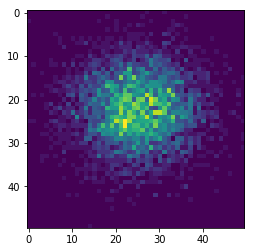

In [14]:
reference_link=os.getcwd()+"\\Bioinformatics\\"
section_str_dict={"Motivation":[("Motivation","Results")],"Results":[("Results","Availability")],"Availability":[("Availability","Contact")],"INTRODUCTION":[("INTRODUCTION","RESULTS")],"METHODS":[("METHODS","RESULT"),("METHODS","RESULTS"),("METHOD","RESULT"),("METHOD","RESULTS")],"RESULTS":[("RESULTS","DISCUSSION"),("RESULT","DISCUSSION"),("RESULTS","DISCUSSIONS"),("RESULT","DISCUSSIONS")],"DISCUSSION":[("DISCUSSIONS","CONCLUSION"),("DISCUSSION","CONCLUSION"),("DISCUSSIONS","CONCLUSIONS"),("DISCUSSION","CONCLUSIONS")],"CONCLUSIONS":[("CONCLUSIONS","AVAILABILITY"),("CONCLUSION","ACKNOWLEDGMENTS"),("CONCLUSIONS","FUNDING")]}
section_len_dict={"Motivation":3,"Results":3,"Availability":1,"INTRODUCTION":10,"METHODS":10,"RESULTS":15,"DISCUSSION":5,"CONCLUSIONS":5}
result=make_article(reference_link,section_str_dict,section_len_dict)
print(result)